In [19]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [20]:
# Installations
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math
from scipy.stats import gaussian_kde
import matplotlib.colors as colors


In [21]:
# This is to take the very white and very black parts of the default matplotlib colormaps off
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [22]:
# Set your data
x = np.random.normal(size=1000)
y = x * 3 + np.random.normal(size=1000)

In [23]:
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """


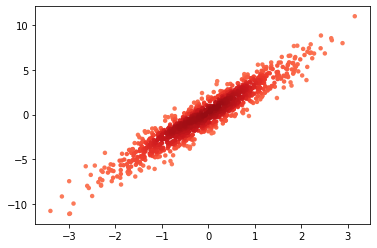

In [25]:
# Example plot with red points
# colormap from here, ’sequential’: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# Bounds of 0.45 and 0.9 are suggestions

plt.scatter(x, y, c=z, s=20, edgecolor='none',cmap=truncate_colormap(plt.get_cmap('Reds'), 0.45, 0.9))